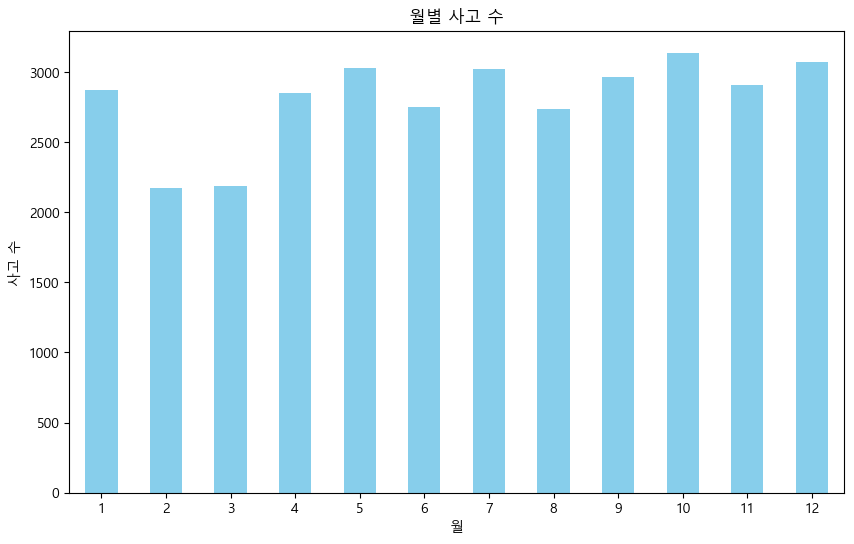

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 경로
file_path = '서울시교통사고.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '월' 컬럼 추가
df['월'] = df['사고일시'].dt.month

# 월별 사고 수 계산
monthly_accidents = df.groupby('월').size()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
monthly_accidents.plot(kind='bar', color='skyblue')
plt.title('월별 사고 수')
plt.xlabel('월')
plt.ylabel('사고 수')
plt.xticks(rotation=0)
plt.show()

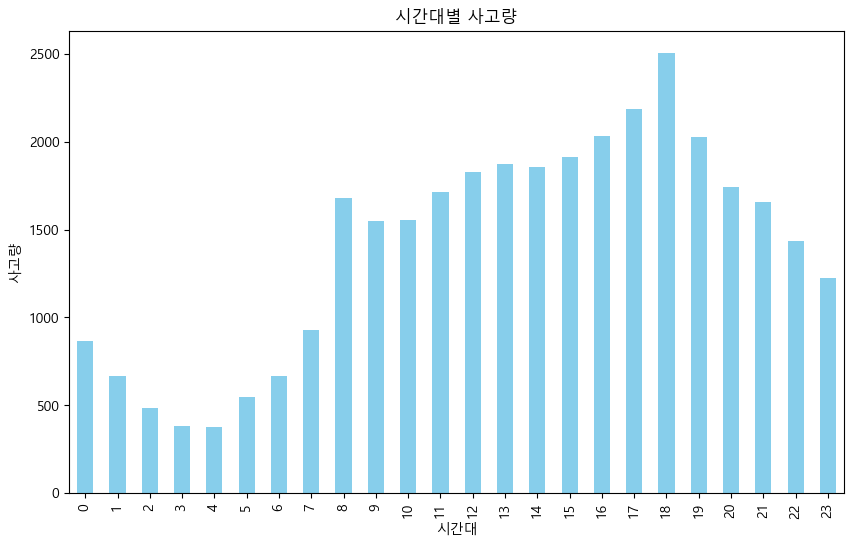

In [2]:
# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '시간대' 컬럼 추가
df['시간대'] = df['사고일시'].dt.hour

# 시간대별 사고량 계산
시간대별_사고수 = df['시간대'].value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
시간대별_사고수.plot(kind='bar', color='skyblue')
plt.title('시간대별 사고량')
plt.xlabel('시간대')
plt.ylabel('사고량')
plt.show()

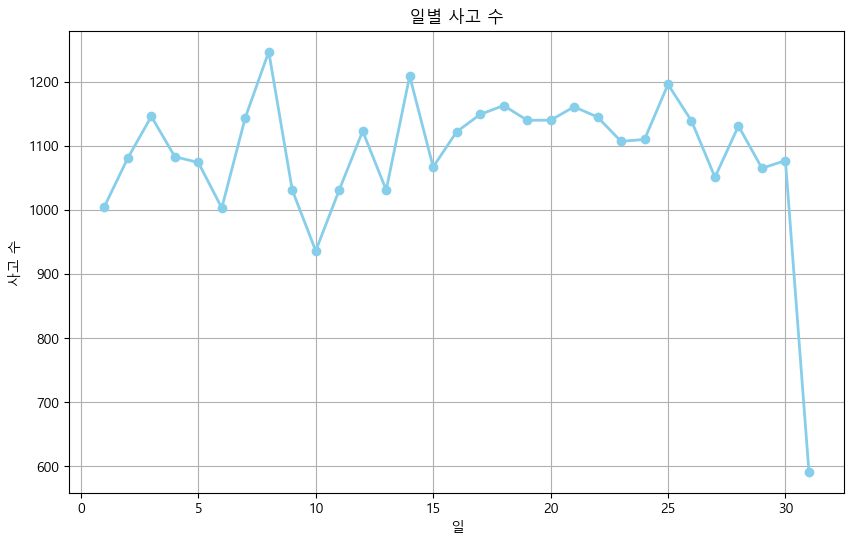

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 경로
file_path = '서울시교통사고.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '일' 컬럼 추가
df['일'] = df['사고일시'].dt.day

# 일별 사고 수 계산
daily_accidents = df.groupby('일').size()

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(daily_accidents.index, daily_accidents.values, marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.title('일별 사고 수')
plt.xlabel('일')
plt.ylabel('사고 수')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

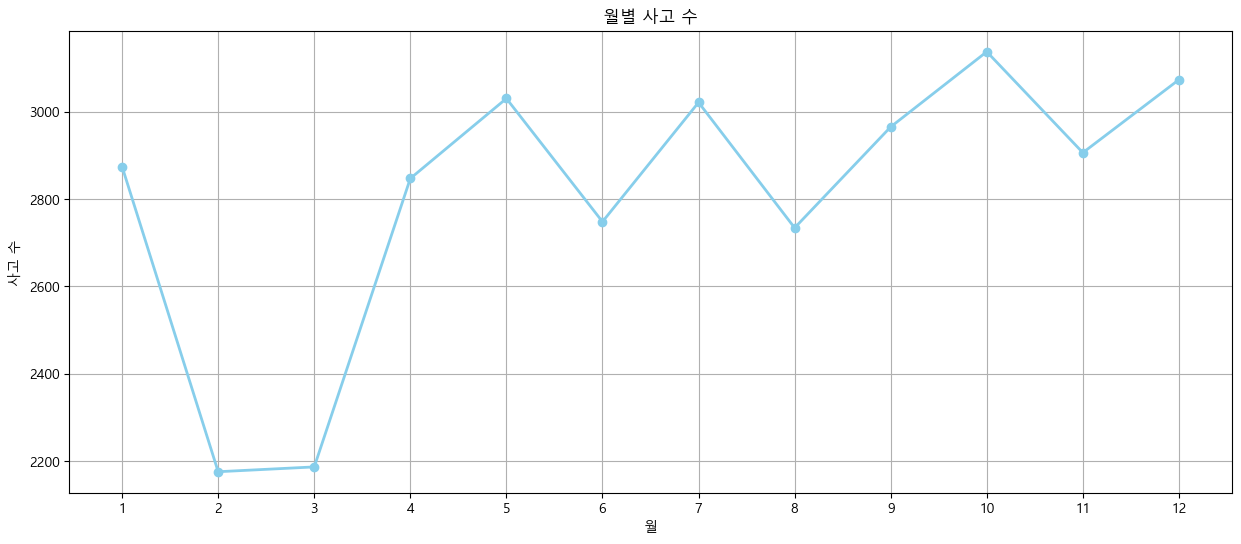

ValueError: setting an array element with a sequence.

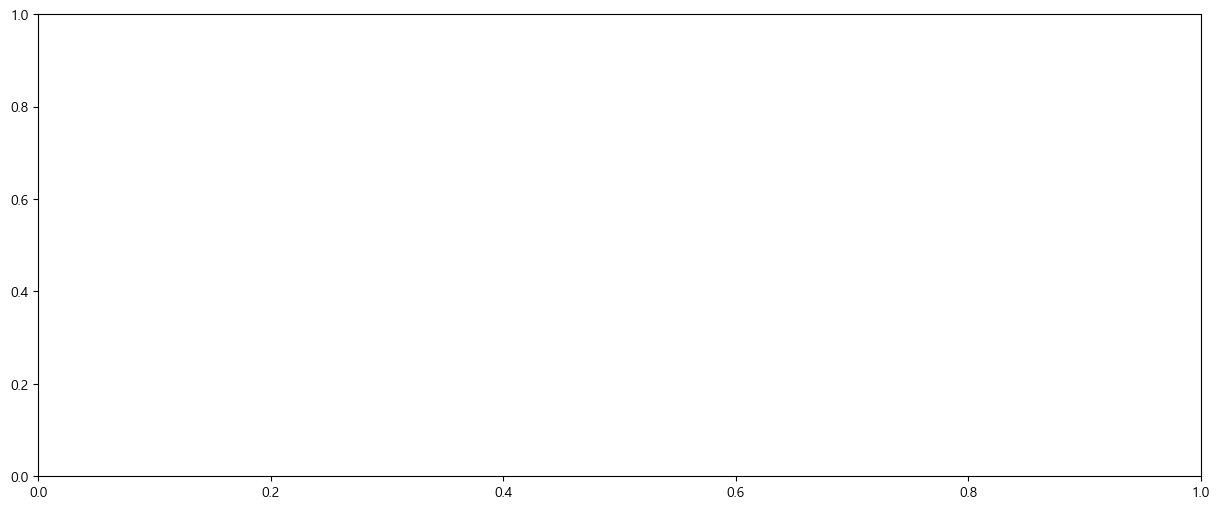

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 경로
file_path = '서울시교통사고.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '월' 컬럼 추가
df['월'] = df['사고일시'].dt.month

# '일' 컬럼 추가
df['일'] = df['사고일시'].dt.day

# 월별 사고 수 계산
monthly_accidents = df.groupby('월').size()

# 일별 사고 수 계산
daily_accidents = df.groupby(['월', '일']).size()

# 월별 꺾은선 그래프 그리기
plt.figure(figsize=(15, 6))
plt.plot(monthly_accidents.index, monthly_accidents.values, marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.title('월별 사고 수')
plt.xlabel('월')
plt.ylabel('사고 수')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

# 일별 꺾은선 그래프 그리기
plt.figure(figsize=(15, 6))
plt.plot(daily_accidents.index, daily_accidents.values, marker='o', color='orange', linestyle='-', linewidth=1)
plt.title('일별 사고 수')
plt.xlabel('일')
plt.ylabel('사고 수')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

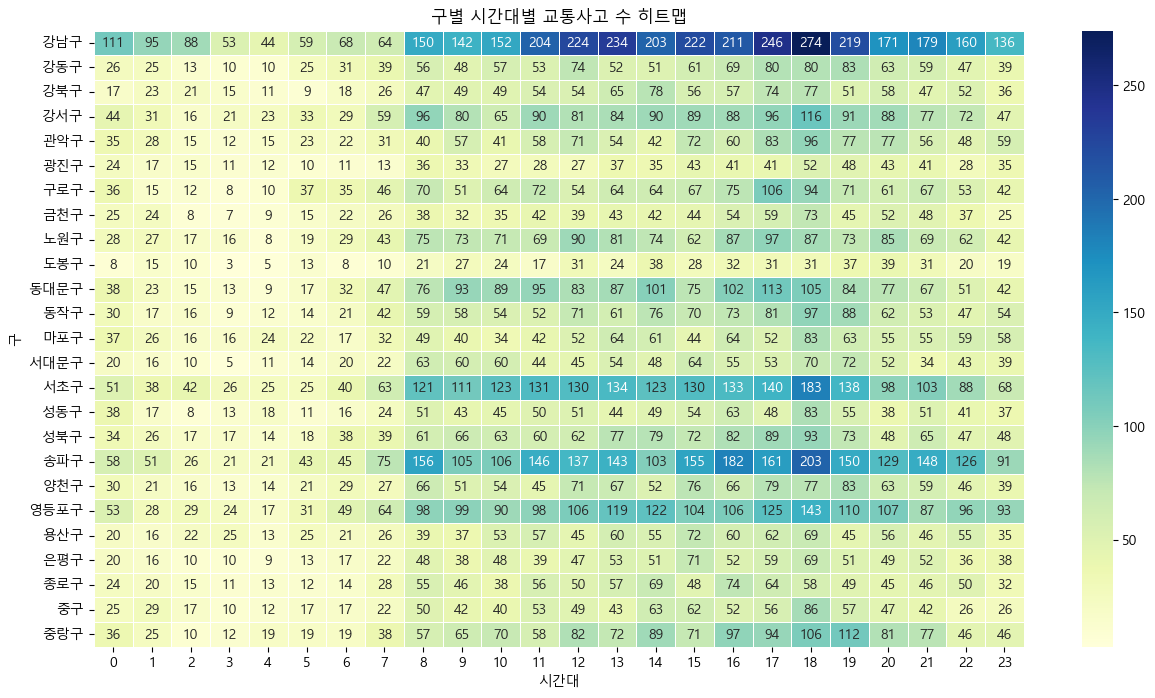

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 경로
file_path = '서울시교통사고.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '시간대' 컬럼 추가
df['시간대'] = df['사고일시'].dt.hour

# '구' 컬럼 추가
df['구'] = df['시군구'].apply(lambda x: x.split()[1])

# 구별 시간대별 사고 수 계산
accidents_by_time_and_district = df.groupby(['구', '시간대']).size().unstack(fill_value=0)

# 히트맵 그리기
plt.figure(figsize=(15, 8))
sns.heatmap(accidents_by_time_and_district, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('구별 시간대별 교통사고 수 히트맵')
plt.xlabel('시간대')
plt.ylabel('구')
plt.show()

C:\Users\ogi\AppData\Local\Temp\ipykernel_13264\4057060475.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['구'] = filtered_df['시군구'].apply(lambda x: x.split()[1])


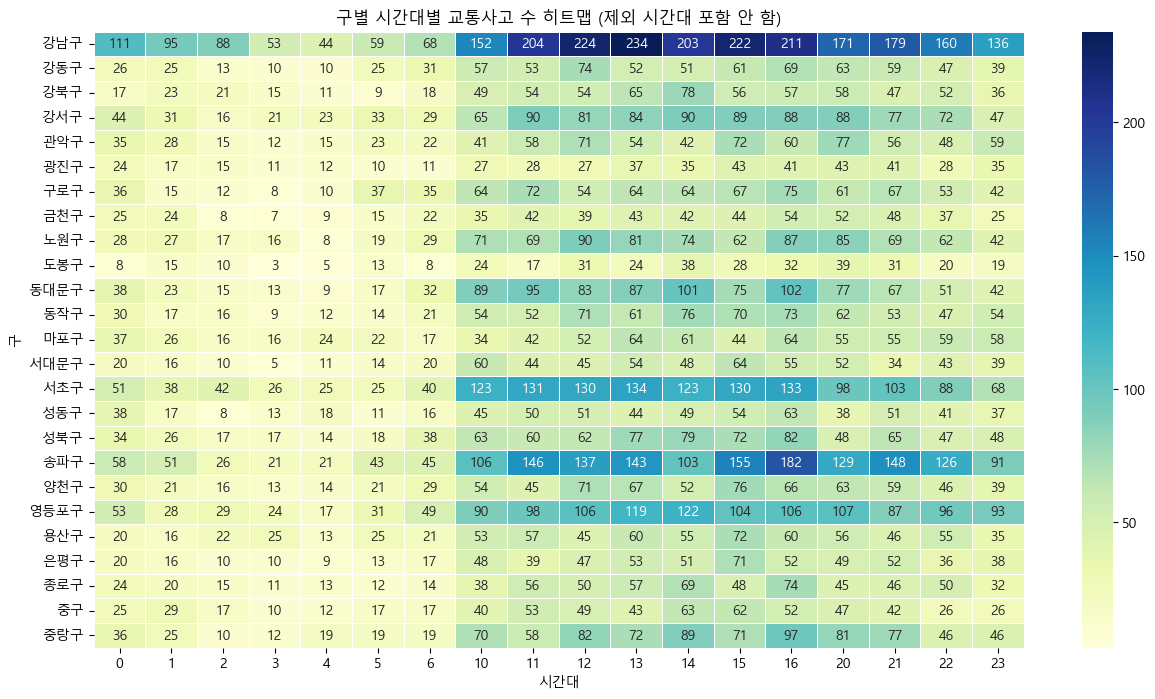

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 경로
file_path = '서울시교통사고.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '시간대' 컬럼 추가
df['시간대'] = df['사고일시'].dt.hour

# 제외할 시간대 필터링
excluded_hours = [7, 8, 9, 17, 18, 19]
filtered_df = df[~df['시간대'].isin(excluded_hours)]

# '구' 컬럼 추가
filtered_df['구'] = filtered_df['시군구'].apply(lambda x: x.split()[1])

# 구별 시간대별 사고 수 계산
accidents_by_time_and_district = filtered_df.groupby(['구', '시간대']).size().unstack(fill_value=0)

# 히트맵 그리기
plt.figure(figsize=(15, 8))
sns.heatmap(accidents_by_time_and_district, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('구별 시간대별 교통사고 수 히트맵 (제외 시간대 포함 안 함)')
plt.xlabel('시간대')
plt.ylabel('구')
plt.show()

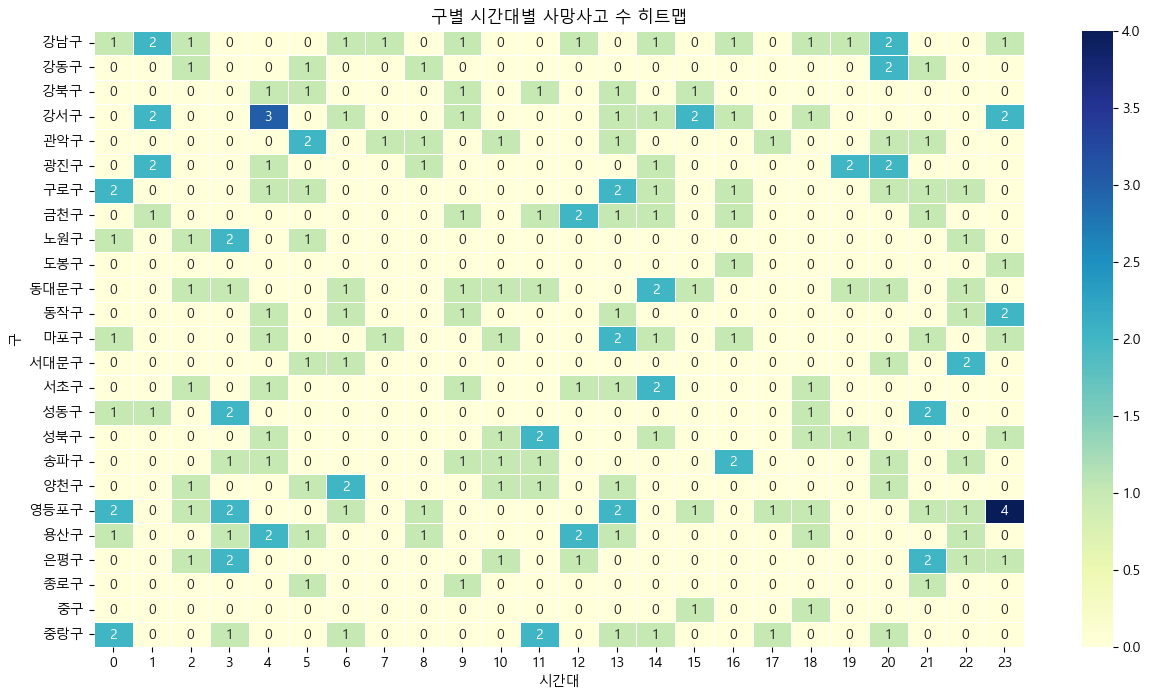

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 경로
file_path = '서울시교통사고.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '시간대' 컬럼 추가
df['시간대'] = df['사고일시'].dt.hour

# '구' 컬럼 추가
df['구'] = df['시군구'].apply(lambda x: x.split()[1])

# '사고내용'이 '사망사고'인 데이터 필터링
fatal_accidents_df = df[df['사고내용'] == '사망사고']

# 구별 시간대별 사망사고 수 계산
fatal_accidents_by_time_and_district = fatal_accidents_df.groupby(['구', '시간대']).size().unstack(fill_value=0)

# 히트맵 그리기
plt.figure(figsize=(15, 8))
sns.heatmap(fatal_accidents_by_time_and_district, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('구별 시간대별 사망사고 수 히트맵')
plt.xlabel('시간대')
plt.ylabel('구')
plt.show()

In [30]:
import pandas as pd

# CSV 파일 불러오기 (인코딩 지정)
file_path = '서울시교통사고.csv'
df = pd.read_csv(file_path, encoding='cp949')

# '사고일시' 열을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# 시간대별로 사고 횟수 계산
df['시간대'] = df['사고일시'].dt.hour

# 0~24시까지의 평균 사고 수 계산
average_accidents_per_hour = df.groupby('시간대').size().mean()

# 결과 출력
print("전체 시간대의 평균 사고 수:", average_accidents_per_hour)

# 각 일자의 사고 횟수 계산
daily_accident_counts = df['사고일시'].dt.date.value_counts()

# 전체 일수
total_days = len(daily_accident_counts)

# 전체 일자의 합계 사고 횟수
total_accidents = daily_accident_counts.sum()

# 하루 평균 사고 횟수 계산
average_accidents_per_day = total_accidents / total_days

# 결과 출력
print("하루 평균 사고 횟수:", average_accidents_per_day)


전체 시간대의 평균 사고 수: 1404.0833333333333
하루 평균 사고 횟수: 92.32328767123288


In [32]:
# 전체 365일 중 1시간 동안의 교통사고 횟수 계산
total_accident_count = len(df)
hours_in_a_year = 24 * 365
average_accidents_per_hour = total_accident_count / hours_in_a_year

print("전체 365일 중 1시간 동안의 평균 교통사고 횟수:", average_accidents_per_hour)

전체 365일 중 1시간 동안의 평균 교통사고 횟수: 3.8468036529680365


In [34]:
# 11시부터 14시까지의 데이터 필터링
filtered_df = df[(df['사고일시'].dt.hour >= 11) & (df['사고일시'].dt.hour <= 14)]

# 해당 시간대의 평균 교통사고 횟수 계산
average_accidents = len(filtered_df) / len(set(filtered_df['사고일시'].dt.date))

print("11시부터 14시까지의 평균 교통사고 횟수:", average_accidents)

print("11시부터 14시까지의 시간당 평균 교통사고 횟수:", average_accidents/4)

11시부터 14시까지의 평균 교통사고 횟수: 19.91780821917808
11시부터 14시까지의 시간당 평균 교통사고 횟수: 4.97945205479452


In [35]:
# 이전 값
previous_value = 3.8468036529680365

# 새로운 값
new_value = 4.97945205479452

# 증가율 계산
increase_percentage = ((new_value - previous_value) / previous_value) * 100

print(f"증가율: {increase_percentage:.2f}%")

증가율: 29.44%


In [38]:
import pandas as pd

# CSV 파일 불러오기
file_path = '서울시교통사고.csv'
df = pd.read_csv(file_path, encoding='cp949')

# '사고일시' 열을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# 시간대별로 사고 횟수 계산
df['시간대'] = df['사고일시'].dt.hour

# 제외할 시간대 설정
excluded_hours = [7, 8, 9, 17, 18, 19]

# 특정 시간대의 사고 건수 제외
filtered_df = df[~df['시간대'].isin(excluded_hours)]

# 전체 시간대에 대한 평균 사고 횟수 계산
average_accidents = filtered_df['사고건수'].mean()

print(f"07, 08, 09, 17, 18, 19시를 제외한 시간대의 평균 사고 횟수: {average_accidents:.2f}")

KeyError: '사고건수'